In [1]:
from pyhmc import hmc
import numpy as np
import pandas as pd
import random
import scipy.stats as st
import matplotlib.pyplot as plt

In [58]:
#source: https://towardsdatascience.com/python-hamiltonian-monte-carlo-from-scratch-955dba96a42d
def normal(x, mu, sigma):
    numerator = np.exp(-1*((x - mu)**2)/(2*sigma**2))
    denominator = sigma*np.sqrt(2*np.pi)
    return numerator/denominator

def neg_log_prob(x, mu, sigma):
    prob = np.log(normal(x=x, mu=mu, sigma=sigma))
    grad = -1*(x-mu)/(sigma**2)
    return prob, grad

In [59]:
x = np.random.randn(1)
mu = 0.0
sigma = 1.0
step_size = 0.2
num_steps = 60
trial = hmc(fun=neg_log_prob, x0=x, args=(mu, sigma,), n_samples=5000, n_burn=1000, n_steps=num_steps, epsilon=step_size, return_diagnostics=True)

In [60]:
trial

(array([[ 1.02864945],
        [ 0.27600592],
        [-0.76654926],
        ...,
        [ 0.44046879],
        [ 0.1993706 ],
        [ 0.1993706 ]]),
 {'pos': array([[ 1.02864945],
         [ 0.27600592],
         [-0.76654926],
         ...,
         [ 0.44046879],
         [ 0.1993706 ],
         [ 0.89353346]]),
  'mom': array([[-1.07721878],
         [-1.06173508],
         [ 0.19711014],
         ...,
         [ 1.2146634 ],
         [-0.50118631],
         [-0.68745092]]),
  'acc': array([0.81135501, 1.31473711, 0.86717309, ..., 2.06180356, 1.04392608,
         0.80943931]),
  'rej': 0.2082,
  'stps': 0.2})

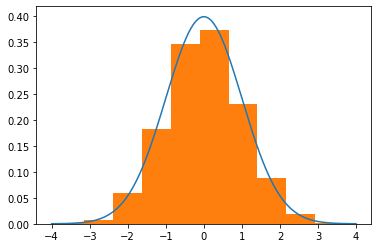

In [63]:
lines = np.linspace(-4, 4, 10_000)
normal_curve = [normal(x=l,mu=mu, sigma=sigma) for l in lines]
plt.plot(lines, normal_curve)
plt.hist(trial[0], density=True)
plt.show()

In [8]:
sigma_matrix = np.matrix([[0.002, 0], [0, 500]])
inv_sigma = np.linalg.inv(sigma_matrix)
inv_sigma

matrix([[5.e+02, 0.e+00],
        [0.e+00, 2.e-03]])

In [9]:
def k_function(gamma_i, gamma_j):
    return np.exp(-0.5*gamma_i.T@inv_sigma@gamma_j).item(0)
k = k_function(np.array([0.1,50]), np.array([0.1,50]))
k

0.006737946999085467

In [10]:
from itertools import product
step_sizes = [0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20] #E
num_steps = [50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100] #L
gammas = list(product(step_sizes, num_steps))
gammas

[(0.1, 50),
 (0.1, 55),
 (0.1, 60),
 (0.1, 65),
 (0.1, 70),
 (0.1, 75),
 (0.1, 80),
 (0.1, 85),
 (0.1, 90),
 (0.1, 95),
 (0.1, 100),
 (0.11, 50),
 (0.11, 55),
 (0.11, 60),
 (0.11, 65),
 (0.11, 70),
 (0.11, 75),
 (0.11, 80),
 (0.11, 85),
 (0.11, 90),
 (0.11, 95),
 (0.11, 100),
 (0.12, 50),
 (0.12, 55),
 (0.12, 60),
 (0.12, 65),
 (0.12, 70),
 (0.12, 75),
 (0.12, 80),
 (0.12, 85),
 (0.12, 90),
 (0.12, 95),
 (0.12, 100),
 (0.13, 50),
 (0.13, 55),
 (0.13, 60),
 (0.13, 65),
 (0.13, 70),
 (0.13, 75),
 (0.13, 80),
 (0.13, 85),
 (0.13, 90),
 (0.13, 95),
 (0.13, 100),
 (0.14, 50),
 (0.14, 55),
 (0.14, 60),
 (0.14, 65),
 (0.14, 70),
 (0.14, 75),
 (0.14, 80),
 (0.14, 85),
 (0.14, 90),
 (0.14, 95),
 (0.14, 100),
 (0.15, 50),
 (0.15, 55),
 (0.15, 60),
 (0.15, 65),
 (0.15, 70),
 (0.15, 75),
 (0.15, 80),
 (0.15, 85),
 (0.15, 90),
 (0.15, 95),
 (0.15, 100),
 (0.16, 50),
 (0.16, 55),
 (0.16, 60),
 (0.16, 65),
 (0.16, 70),
 (0.16, 75),
 (0.16, 80),
 (0.16, 85),
 (0.16, 90),
 (0.16, 95),
 (0.16, 100),
 (0

In [11]:
gamma_1 = np.array([0.1, 50])
prev_gammas = np.array(gamma_1)
def K_matrix(gamma_i):
    global prev_gammas
    prev_gammas = np.vstack([prev_gammas, gamma_i])
    K_mat = np.zeros(shape=(len(prev_gammas), len(prev_gammas)))
    for m in range(len(prev_gammas)):
        row_list = list()
        for n in range(len(prev_gammas)):
            k = k_function(prev_gammas[m], prev_gammas[n])
            row_list.append(k)
        K_mat[m] = np.array(row_list)
    return K_mat

In [27]:
K2 = K_matrix(np.array([0.1, 60]))
K2

array([[0.00673795, 0.00408677, 0.00408677, 0.00408677],
       [0.00408677, 0.00224287, 0.00224287, 0.00224287],
       [0.00408677, 0.00224287, 0.00224287, 0.00224287],
       [0.00408677, 0.00224287, 0.00224287, 0.00224287]])

In [134]:
K3 = K_matrix(np.array([0.2, 50]))
K3

0.006737946999085467

In [3]:
def k_vector(K_mat):
    return K_mat[-1].T

In [16]:
k_vect = k_vector(K2)
k_vect

array([0.00408677, 0.00224287])

In [20]:
def f_function(gamma_i):
    return np.random.normal(0, k_function(np.array(gamma_i), np.array(gamma_i)), 1).item(0)

In [21]:
f = f_function(np.array([0.1, 50]))
f

-0.000129990162652671

In [22]:
def e_function(sigma_eta):
    return np.random.normal(0, sigma_eta, 1).item(0)

In [24]:
def r_function(gamma_i, sigma_eta):
    return f_function(gamma_i) + e_function(sigma_eta)

In [25]:
r = r_function(np.array([0.1, 50]), 2)
r

3.084314250807379

In [28]:
def mu(gamma_i, s, sigma_eta, K_mat, k_vect, r_vect):
    return k_vect.T @ np.linalg.inv(K_mat + sigma_eta*np.identity(K_mat.shape[0])) @ r_vect*s

In [29]:
mu_i = mu(np.array([0.1, 70]), 2, 2, K2, np.array([1,2,3,4]), np.array([4,3,2,1]))
mu_i

19.841239491018868

In [30]:
def sigma(gamma_i, sigma_eta, K_mat, k_vect):
    return k_function(np.array(gamma_i), np.array(gamma_i)) - (k_vect.T @ np.linalg.inv(K_mat + sigma_eta*np.identity(K_mat.shape[0])) @ k_vect)

In [31]:
sigma_i = sigma(np.array([0.1, 70]), 2, K2, np.array([1,2,3,4]))
sigma_i

-14.9343502507144

In [32]:
def beta(i):
    return 2*np.log(((i + 1)**3*(np.pi**2))/0.3)

In [33]:
beta = beta(5)
beta

17.737421967417802

In [34]:
def acquisition(gamma_i, s, sigma_eta, K_mat, k_vect, r_vect, i, p):
    return mu(gamma_i, s, sigma_eta, K_mat, k_vect, r_vect) + p*sigma(gamma_i, sigma_eta, K_mat, k_vect)*np.sqrt(beta(i))

In [ ]:
from itertools import product
step_sizes = [0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20] #E
num_steps = [50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100] #L
gammas = list(product(step_sizes, num_steps))
alpha = 4
i = 1
m = 10 #num of iterations = burnin/k = 1000/100